### Importamos librerías y funciones.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

#### Cargamos nuestros datos de entrenamiento

In [4]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

### Creamos y entrenamos el modelo con todas nuestras columnas y solo con las más correladas con el target

In [5]:
#Entrenamos con nuestros datos completos
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_lin = lin_reg.predict(X_test)

In [6]:
#Entrenamos con solo los de mayor correlación
lin_reg_corr = LinearRegression()
lin_reg_corr.fit(X_train_corr, y_train_corr)
pred_lin_corr = lin_reg_corr.predict(X_test_corr)

### Analizamos los resultados

In [7]:
#Mostramos métricas para todos los valores
func.muestra_metricas(data = y_test,data_pred = pred_lin)

MAE: 1.5395349947928132
MSE: 6.145911185331955
RMSE: 2.47909483185536
R2 score: 0.5484797351827257


In [8]:
#Mostramos métricas para las columnas más correladas
func.muestra_metricas(data = y_test,data_pred = pred_lin_corr)

MAE: 1.5577086326808367
MSE: 6.422707156887652
RMSE: 2.53430605035928
R2 score: 0.528144428243136


### Mostramos gráficas

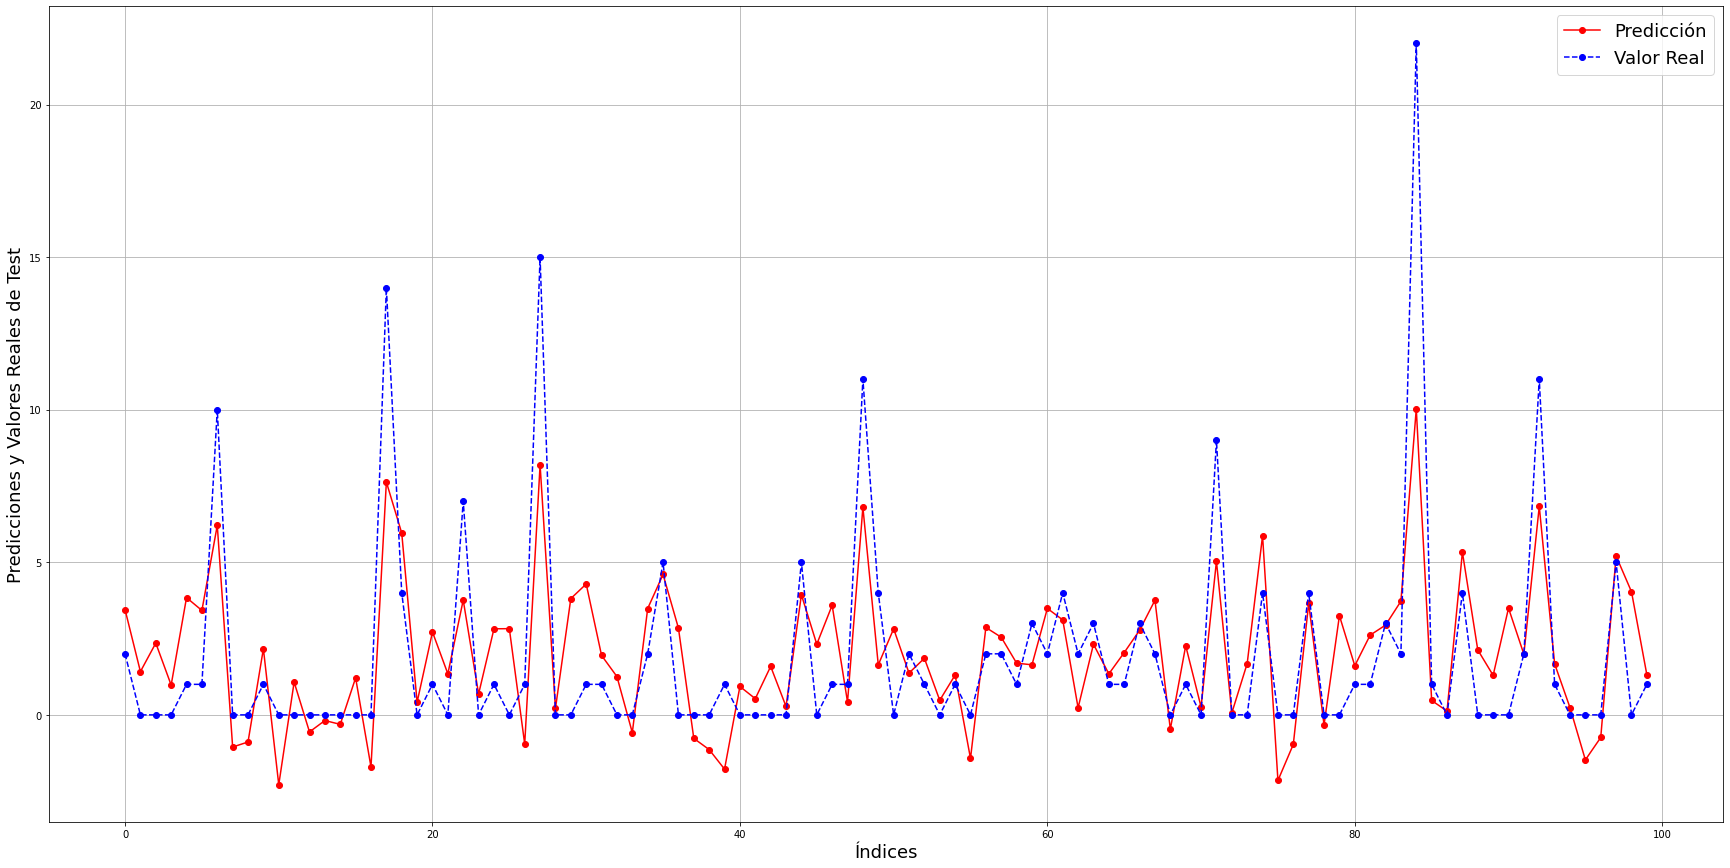

In [9]:
#Graficamos con todas las columnas
func.muestra_pred(data = y_test, data_pred = pred_lin, long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Regresión Lineal.jpg" )

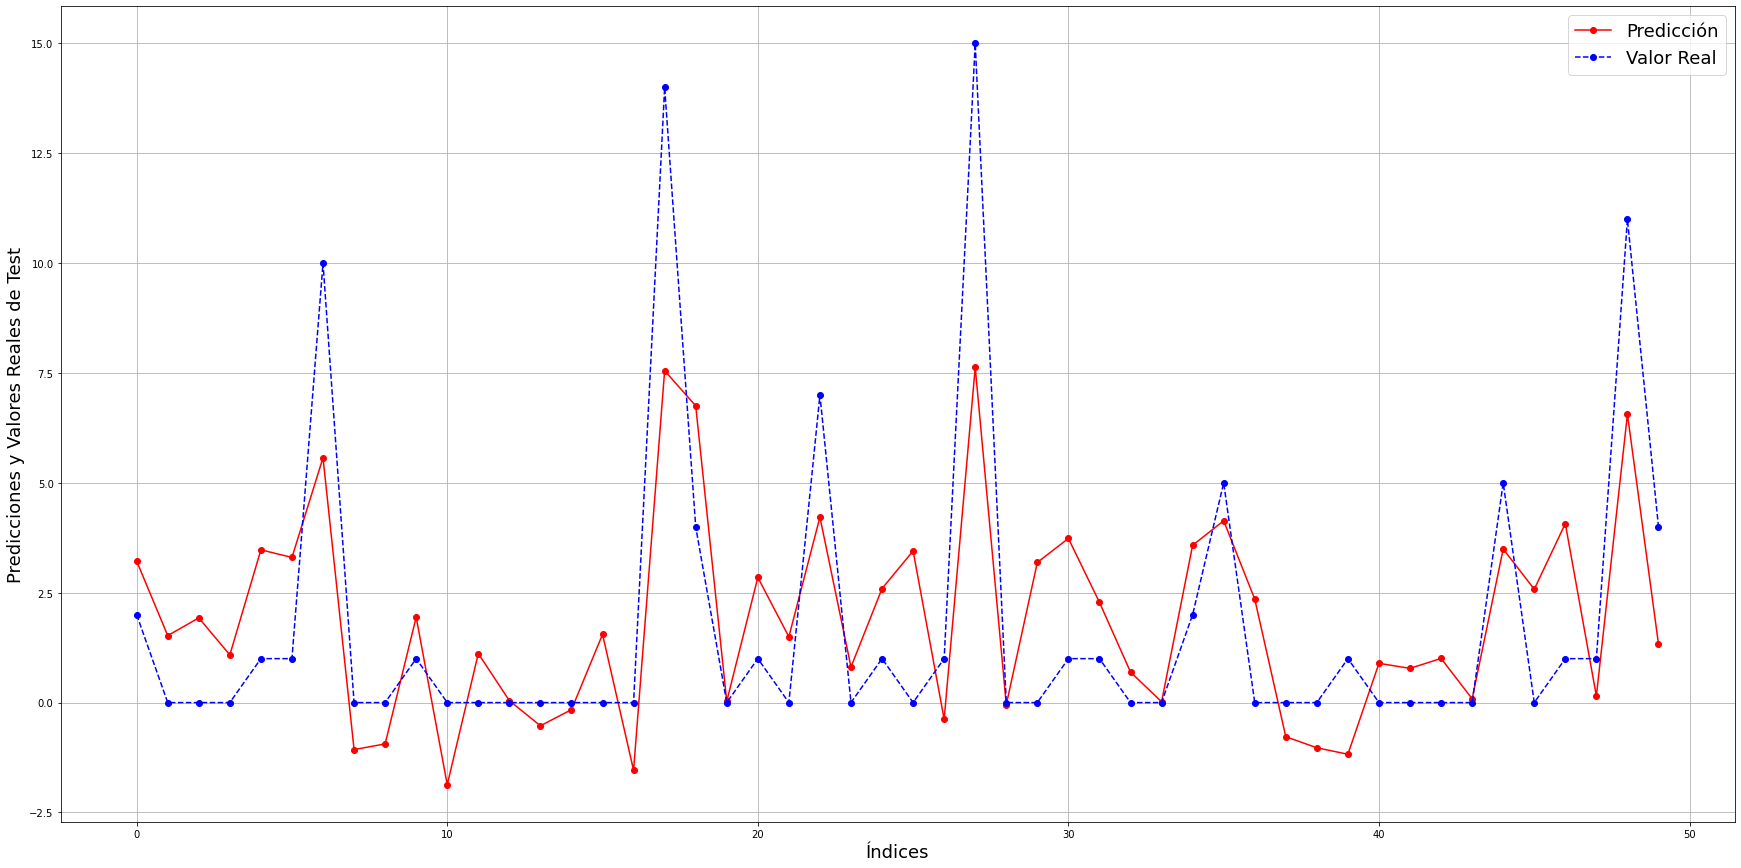

In [10]:
#Graficamos solo con las más correladas
func.muestra_pred(data = y_test_corr, data_pred = pred_lin_corr, long = 50, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Regresión Lineal Corr Alta.jpg" )

### Guardamos el modelo aunque claramente su respuesta es muy mala

In [11]:
func.guarda_modelo(modelo =lin_reg, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/lineal_reg.model")

In [13]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_lin[70:91],0)}
df_prediccion = pd.DataFrame(dict_pred)
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones lineal.csv', sep = ';')
df_prediccion

,Valor Real,Predicción
0,0.0,0.0
1,9.0,5.0
2,0.0,0.0
3,0.0,2.0
4,4.0,6.0
5,0.0,-2.0
6,0.0,-1.0
7,4.0,4.0
8,0.0,-0.0
9,0.0,3.0
